<a href="https://colab.research.google.com/github/PJSoo/welcome/blob/main/Pandas_CSV_Read.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 지역별 온도데이터 
https://data.kma.go.kr/

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
csv_file ='/content/gdrive/My Drive/Colab Notebooks/data/400_20200411221745769.csv'

try:
    df = pd.read_csv(csv_file)
except  OSError as err:
    print("OS error: {0}".format(err))
df.head()

,format: day,hour,value location:63_108 Start : 20190401
0,1,0.0,8.1
1,1,100.0,8.8
2,1,200.0,8.3
3,1,300.0,9.8
4,1,400.0,9.5


In [ ]:
df.columns

Index([' format: day', 'hour', 'value location:63_108 Start : 20190401 '], dtype='object')

In [ ]:
df = df.rename(columns={'value location:63_108 Start : 20190401 ': 'temp'})

In [ ]:
df.head()

,format: day,hour,temp
0,1,0.0,8.1
1,1,100.0,8.8
2,1,200.0,8.3
3,1,300.0,9.8
4,1,400.0,9.5


In [ ]:
df_temp = df['temp']
df_temp.describe()

count    8784.000000
mean       12.549966
std        10.702835
min       -50.000000
25%         3.800000
50%        12.900000
75%        21.500000
max        36.700001
Name: temp, dtype: float64

In [ ]:
df_temp.shape

(8795,)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [ ]:
x = list(range(len(df_temp)))

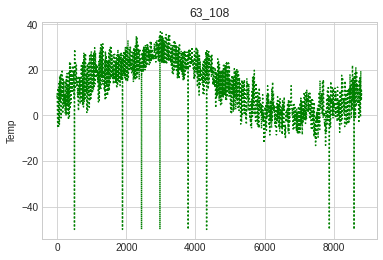

In [ ]:
plt.plot(x, df_temp, ':b', color='g')
plt.xlim(0, 5)
plt.ylim(15, 50);
plt.axis('tight');
plt.title("63_108")
plt.ylabel("Temp");

plt.show()

In [ ]:
df_normal = [x for x in df_temp if x > -20]

In [ ]:
x = list(range(len(df_normal)))

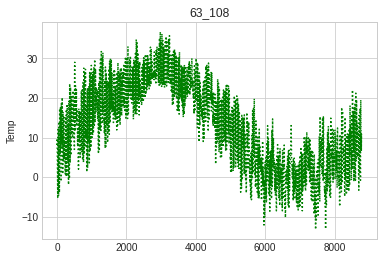

In [ ]:
plt.plot(x, df_normal, ':b', color='g')
plt.xlim(0, 5)
plt.ylim(15, 50);
plt.axis('tight');
plt.title("63_108")
plt.ylabel("Temp");

plt.show()

In [ ]:
df_class = pd.cut(df['temp'], bins=[-100, -10, 40], labels=['abnormal', 'normal'])  #1구간 -100 2구간 -10 3구간 40 / df_class에 값을 넣음 오류제거

In [ ]:
df_class.head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: temp, dtype: category
Categories (2, object): ['abnormal' < 'normal']

In [ ]:
df_class.count()

8784

In [ ]:
df_class[df_class =='abnormal'].head()  # 오류값 제거 한것들

503     abnormal
1891    abnormal
2441    abnormal
2973    abnormal
3788    abnormal
Name: temp, dtype: category
Categories (2, object): ['abnormal' < 'normal']

In [ ]:
df_class[df_class =='abnormal'].index  #데이터베이스로 예를 들면 같은것이다 값들 

Int64Index([ 503, 1891, 2441, 2973, 3788, 4322, 5978, 5979, 5980, 5981, 5982,
            6000, 6001, 6597, 6598, 7463, 7464, 7467, 7468, 7469, 7470, 7471,
            7472, 7489, 7490, 7491, 7758, 7759, 7760, 7866, 8581],
           dtype='int64')

In [ ]:
df['class'] =df_class #기존의 데이터 프레임에 붙여버림 df에 df_class에 넣어버린것 

In [ ]:
df.columns

Index([' format: day', 'hour', 'temp', 'class'], dtype='object')

In [ ]:
df[df['class'] == 'abnormal'].head()  

,format: day,hour,temp,class
503,21,2300.0,-50.0,abnormal
1891,18,1700.0,-50.0,abnormal
2441,11,1400.0,-50.0,abnormal
2973,2,1700.0,-50.0,abnormal
3788,5,1500.0,-50.0,abnormal


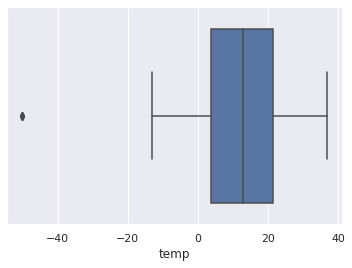

In [ ]:
import seaborn as sns #visualisation                esaborn 패키지 
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
sns.boxplot(x=df['temp'])